In [15]:
#initial clusters based on simple KMeans
import pandas as pd
from sklearn.cluster import KMeans 

df_microwaves = pd.read_csv("data/microwave_new.csv")
df_microwaves = df_microwaves[~((df_microwaves["cu_ft"] == "unknown") & (df_microwaves["price_value"] < 70))]
df_microwaves["commerical"] = df_microwaves["title"].str.contains("Commercial", case=False, na=False)

prices = df_microwaves[["price_value"]].copy()
kmeans = KMeans(n_clusters=3, random_state=0).fit(prices)
df_microwaves["price_cluster"] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_order = np.argsort(cluster_centers)
cluster_map = {old: label for old, label in zip(cluster_order, ["low", "medium", "high"])}
df_microwaves["price_tier"] = df_microwaves["price_cluster"].map(cluster_map)
cluster_ranges = df_microwaves.groupby(["price_tier"])["price_value"].agg(["min", "median", "max", "count"]).round(2)
print(cluster_ranges)

                min   median      max  count
price_tier                                  
high        1197.00  1411.00  1799.00      8
low           44.99   149.99   399.95    103
medium       468.00   637.50  1017.46      8


Because these clusters were highly imbalanced, KMeans Constrained was done.  

### Add pricing tiers

In [16]:
#run kmc.py in a virtual environment (kmc-env) to export the data sets with kmeans constrained clusters 
#this had to be done in a separate environment due to version issues in the kernel

import pandas as pd
import numpy as np

tier_order = ["low", "medium", "high"]
price_tier_map = {"low": 0, "medium": 1, "high": 2}

df_iphone = pd.read_csv("data/iphone_kmc.csv")
df_iphone["price_tier"] = pd.Categorical(df_iphone["price_tier"], categories=tier_order, ordered=True)
df_iphone["price_tier_encoded"] = df_iphone["price_tier"].map(price_tier_map).astype(int)
summary_iphone = df_iphone.groupby(["price_tier"]).agg({
    "price.value": ['count', 'mean', 'min', "median", 'max']})
print("iPhone Summary")
print(summary_iphone, "\n")
median_iphone = df_iphone["price.value"].median()
df_iphone["is_high_price"] = df_iphone["price.value"] > median_iphone

df_soccer = pd.read_csv("data/soccer_kmc.csv")
df_soccer["price_tier"] = pd.Categorical(df_soccer["price_tier"], categories=tier_order, ordered=True)
df_soccer["price_tier_encoded"] = df_soccer["price_tier"].map(price_tier_map).astype(int)
summary_soccer = df_soccer.groupby(["price_tier"]).agg({
    "price.value": ['count', 'mean', 'min', "median", 'max']})
print("Soccer Summary")
print(summary_soccer, "\n")
median_soccer = df_soccer["price.value"].median()
df_soccer["is_high_price"] = df_soccer["price.value"] > median_soccer

df_microwaves = pd.read_csv("data/microwave_kmc.csv")
df_microwaves["price_tier"] = pd.Categorical(df_microwaves["price_tier"], categories=tier_order, ordered=True)
summary_microwave = df_microwaves.groupby(["price_tier"]).agg({
    "price_value": ['count', 'mean', 'min', "median", 'max']})
print("Microwaves Summary")
print(summary_microwave, "\n")
median_microwave = df_microwaves["price_value"].median()
df_microwaves["is_high_price"] = df_microwaves["price_value"] > median_microwave

df_lego = pd.read_csv("data/lego_kmc.csv")
df_lego["price_tier"] = pd.Categorical(df_lego["price_tier"], categories=tier_order, ordered=True)
summary_lego = df_lego.groupby(["price_tier"]).agg({
    "price_value": ['count', 'mean', 'min', "median", 'max']})
print("Lego Summary")
print(summary_lego, "\n")
median_lego = df_lego["price_value"].median()
df_lego["is_high_price"] = df_lego["price_value"] > median_lego


iPhone Summary
           price.value                                      
                 count        mean     min   median      max
price_tier                                                  
low                124  352.649919  215.00  349.915   439.99
medium             166  536.551687  446.99  537.975   650.00
high                96  848.694583  650.00  776.995  1449.99 

Soccer Summary
           price.value                                 
                 count       mean    min median     max
price_tier                                             
low                336  27.519554   5.94  28.98   38.50
medium             414  49.747512  38.88  49.99   60.00
high               250  83.140840  60.00  73.90  299.99 

Microwaves Summary
           price_value                                     
                 count        mean     min  median      max
price_tier                                                 
low                 56  106.860357   44.99  108.95   168.39
mediu

/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_60991/2643405435.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_iphone = df_iphone.groupby(["price_tier"]).agg({
/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_60991/2643405435.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_soccer = df_soccer.groupby(["price_tier"]).agg({
/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_60991/2643405435.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behav

### module imports

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

### iPhone

#### DT

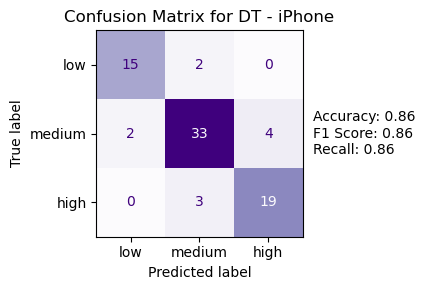

Accuracy: 0.8589743589743589
F1 Score: 0.8590557590557589
Recall Score: 0.8589743589743589


In [18]:
tier_order = ["low", "medium", "high"]
price_tier_map = {"low": 0, "medium": 1, "high": 2}

X_iphone = df_iphone.drop(columns=["itemId", "title", "conditionId", "price.value", 
                                   "price_tier", "seller.username", "condition_desc", 
                                   "category_id", "price.currency", "cluster", "is_high_price", 
                                   "price_tier_encoded"])

X_iphone["model_number"] = X_iphone["model_number"].astype(str)
X_iphone_encoded = pd.get_dummies(X_iphone, columns=["condition", "itemLocation.country", "category_name",
                                                    "specific_carrier", "storage", "model_variant"])
y_iphone = df_iphone["price_tier_encoded"]                              
X_iphone_train, X_iphone_test, y_iphone_train, y_iphone_test = train_test_split(X_iphone_encoded, y_iphone,
                                                                 test_size=0.20, random_state=1216) 
classifier_iphone = DecisionTreeClassifier(random_state = 1216)
classifier_iphone.fit(X_iphone_train, y_iphone_train)

preds_iphone = classifier_iphone.predict(X_iphone_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_iphone_test, preds_iphone)
f1 = f1_score(y_iphone_test, preds_iphone, average="weighted")
recall = recall_score(y_iphone_test, preds_iphone, average="weighted")
cm_iphone = confusion_matrix(y_iphone_test, preds_iphone, labels=[0,1,2])
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=tier_order)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('Confusion Matrix for DT - iPhone')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_iphone.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [19]:
# # tuning, takes several minutes to run
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_iphone = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_iphone.fit(X_iphone_train, y_iphone_train)

# best_model_iphone = grid_search_iphone.best_estimator_

In [20]:
# print(grid_search_iphone.best_params_)
# print(grid_search_iphone.best_score_)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}



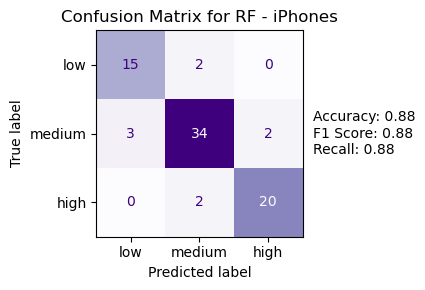

Accuracy: 0.8846153846153846
F1 Score: 0.8847818847818848
Recall Score: 0.8846153846153846


In [21]:
tier_order = ["low", "medium", "high"]
rf_iphone = RandomForestClassifier(random_state = 1216,
                                    n_estimators = 500,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    max_depth=10,
                                    max_features="sqrt")

rf_iphone.fit(X_iphone_train, y_iphone_train)
preds_rf_iphone = rf_iphone.predict(X_iphone_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_iphone_test, preds_rf_iphone)
f1 = f1_score(y_iphone_test, preds_rf_iphone, average="weighted")
recall = recall_score(y_iphone_test, preds_rf_iphone, average="weighted")
cm_iphone = confusion_matrix(y_iphone_test, preds_rf_iphone, labels=[0,1,2])
fig, ax = plt.subplots(figsize=(5,3))
disp_iphone = ConfusionMatrixDisplay(confusion_matrix=cm_iphone, display_labels=tier_order)
disp_iphone = disp_iphone.plot(ax=ax, cmap="Purples", colorbar=False)
disp_iphone.ax_.set_title('Confusion Matrix for RF - iPhones')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_iphone.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

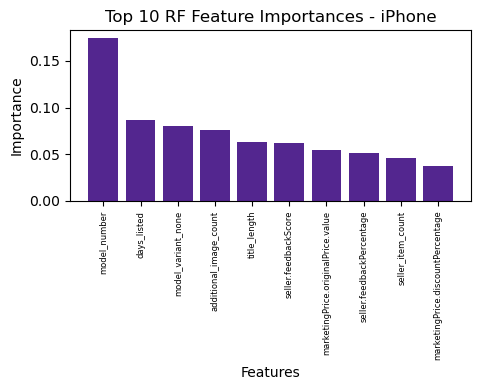

In [22]:
importances = rf_iphone.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top 10
top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(5, 4))
plt.title("Top 10 RF Feature Importances - iPhone")
plt.bar(range(top_n), importances[top_indices], align="center", color="#53268f")
plt.xticks(range(top_n), [X_iphone_train.columns[i] for i in top_indices], rotation=90, fontsize=6)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig("images/3/fi_iphone_top10.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

/opt/anaconda3/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 7 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


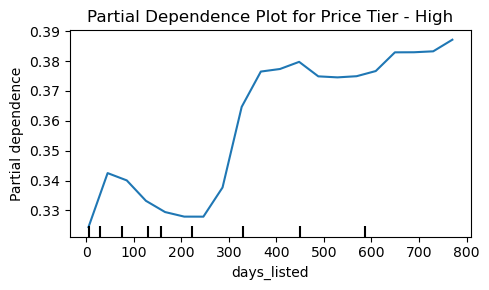

In [23]:
from sklearn.inspection import PartialDependenceDisplay
feature_names = ['days_listed']
fig, ax = plt.subplots(figsize=(5, 3))
PartialDependenceDisplay.from_estimator(
    rf_iphone,
    X_iphone_train,
    features=feature_names,
    kind='average',
    target=0,
    grid_resolution=20,
    ax=ax
)
ax.set_title("Partial Dependence Plot for Price Tier - High")
plt.tight_layout()
plt.savefig("images/3/pdp_iphone.png", dpi=300, bbox_inches='tight')
plt.show()


In [24]:
from sklearn.tree import export_text

# Get one tree from the forest
tree = rf_iphone.estimators_[0]

# Print the tree structure in text form
tree_rules = export_text(tree, feature_names=list(X_iphone_train.columns))
print(tree_rules)


|--- seller.feedbackPercentage <= 98.75
|   |--- model_number <= 15.50
|   |   |--- seller_item_count <= 51.50
|   |   |   |--- additional_image_count <= 1.50
|   |   |   |   |--- additional_image_count <= 0.50
|   |   |   |   |   |--- model_number <= 14.50
|   |   |   |   |   |   |--- condition_Used <= 0.50
|   |   |   |   |   |   |   |--- seller.feedbackScore <= 108050.00
|   |   |   |   |   |   |   |   |--- title_length <= 69.50
|   |   |   |   |   |   |   |   |   |--- title_length <= 65.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- title_length >  65.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- title_length >  69.50
|   |   |   |   |   |   |   |   |   |--- model_variant_Pro Max <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- model_variant_Pro Max >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |

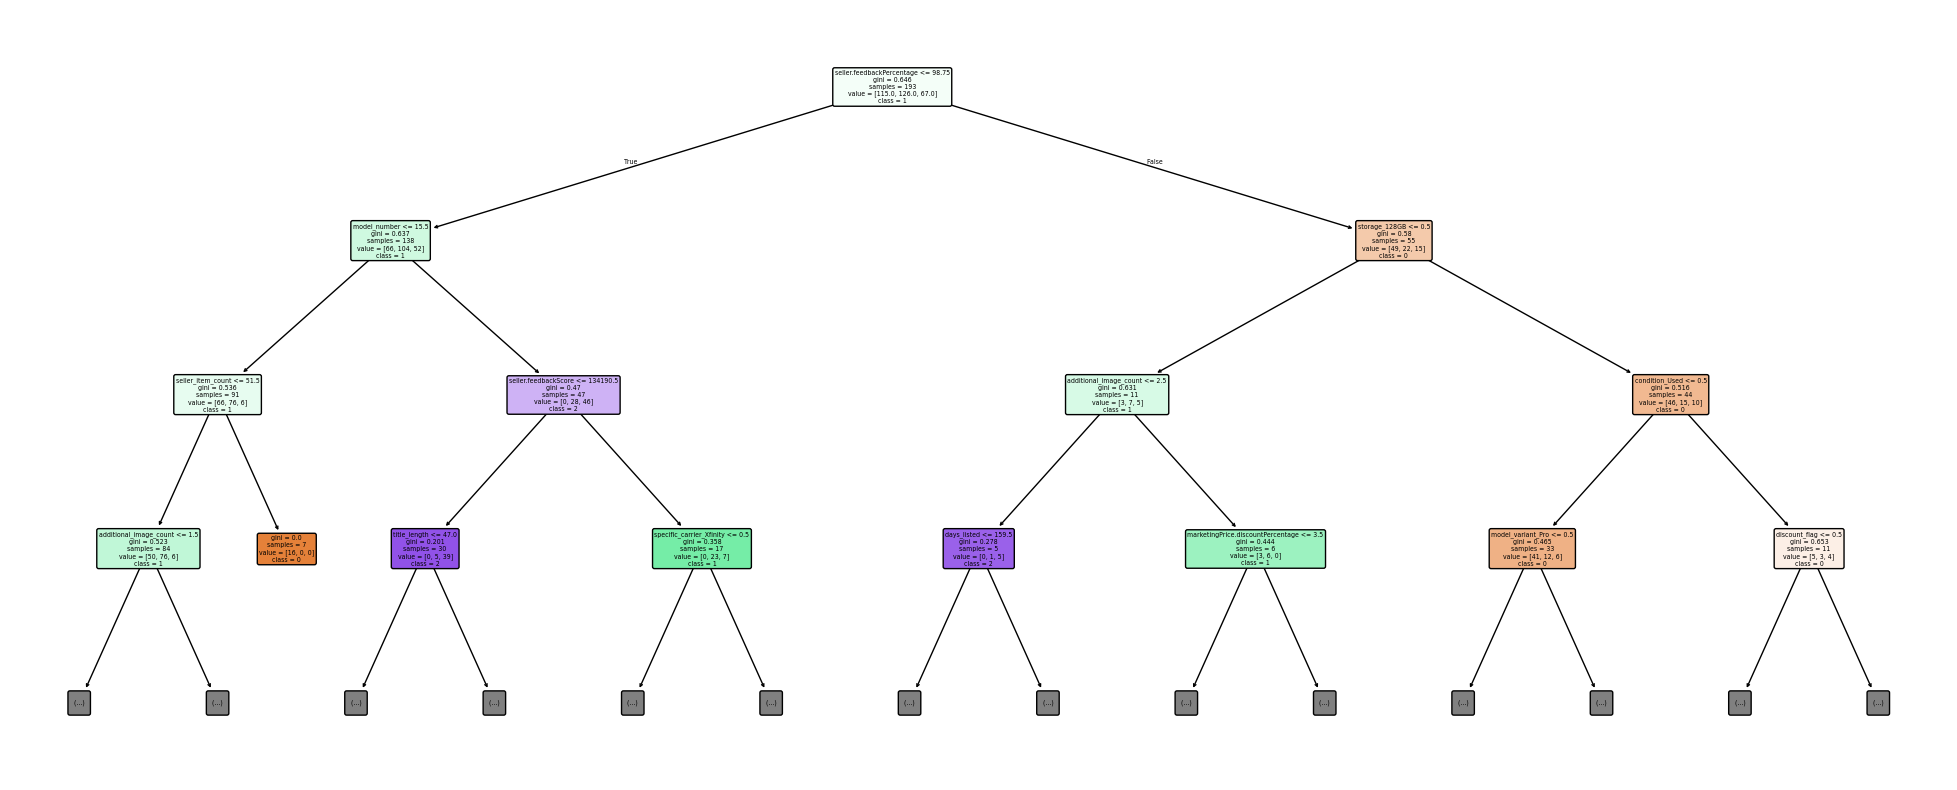

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plot_tree(rf_iphone.estimators_[0], 
          feature_names=X_iphone_train.columns, 
          class_names=rf_iphone.classes_.astype(str),
          filled=True, rounded=True, max_depth=3)
plt.show()


In [26]:
from sklearn.tree import export_graphviz
import graphviz

tree = rf_iphone.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_iphone_train.columns,
                           class_names=rf_iphone.classes_.astype(str),
                           filled=True, rounded=True,
                           max_depth=3)  # limit depth here too

dot_lines = dot_data.split('\n')
for i, line in enumerate(dot_lines):
    if line.strip().startswith('digraph'):
        dot_lines.insert(i + 1, 'bgcolor="#E7E7E7";')
        break
dot_data_with_bg = '\n'.join(dot_lines)

graph = graphviz.Source(dot_data_with_bg)
graph.format = 'png'
graph.render("images/3/rf_tree_iphone")  # Saves PDF "rf_tree_example.pdf"
graph.view()  # Opens the PDF viewer


'images/3/rf_tree_iphone.png'

#### RF - PCA

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

features_iphone = df_iphone[["seller.feedbackPercentage", "seller.feedbackScore", 
                    "days_listed", "shipping_cost", "seller_item_count",
                    "additional_image_count", "title_length"]].fillna(0)

scaler = StandardScaler()
features_scaled_iphone = scaler.fit_transform(features_iphone)

pca = decomposition.PCA(n_components=5)  
X_pca_iphone = pca.fit_transform(features_scaled_iphone)
y_iphone = df_iphone["price_tier_encoded"]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_iphone, y_iphone, test_size=0.2, random_state=1216
)

rf_pca = RandomForestClassifier(random_state = 1216,
                                    n_estimators = 500,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    max_depth=10,
                                    max_features="sqrt")
rf_pca.fit(X_train_pca, y_train_pca)

preds_pca = rf_pca.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, preds_pca)
f1 = f1_score(y_test_pca, preds_pca, average="weighted")
recall = recall_score(y_test_pca, preds_pca, average="weighted")

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.667
F1 Score: 0.672
Recall: 0.667


### Soccer

#### DT

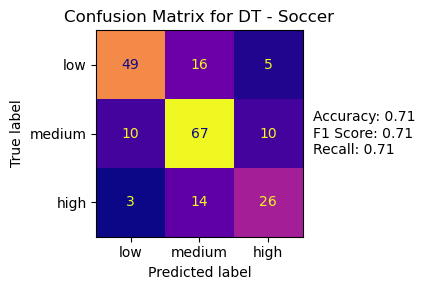

Accuracy: 0.71
F1 Score: 0.7097372012045925
Recall Score: 0.71


In [28]:
tier_order = ["low", "medium", "high"]
X_soccer = df_soccer.drop(columns=["itemId", "title", "conditionId", "price.value", 
                                   "price_tier", "seller.username", "condition_desc", 
                                   "category_id", "price.currency", "cluster", "top_club",
                                   "top_country", "is_high_price", "price_tier_encoded"])

X_soccer_encoded = pd.get_dummies(X_soccer, columns=["condition", "itemLocation.country", "category_name",
                                                    "club", "country"])
y_soccer = df_soccer["price_tier_encoded"]                              
X_soccer_train, X_soccer_test, y_soccer_train, y_soccer_test = train_test_split(X_soccer_encoded, y_soccer,
                                                                 test_size=0.20, random_state=1216) 
classifier_soccer = DecisionTreeClassifier(random_state = 1216)
classifier_soccer.fit(X_soccer_train, y_soccer_train)
preds_soccer = classifier_soccer.predict(X_soccer_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_soccer_test, preds_soccer)
f1 = f1_score(y_soccer_test, preds_soccer, average="weighted")
recall = recall_score(y_soccer_test, preds_soccer, average="weighted")

cm_soccer = confusion_matrix(y_soccer_test, preds_soccer, labels=[0,1,2])
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=tier_order)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('Confusion Matrix for DT - Soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_soccer.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [29]:
## tuning, takes several minutes to run
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_soccer = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_soccer.fit(X_soccer_train, y_soccer_train)

# best_model_soccer = grid_search_soccer.best_estimator_

In [30]:
# print(grid_search_soccer.best_params_)
# print(grid_search_soccer.best_score_)

{'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


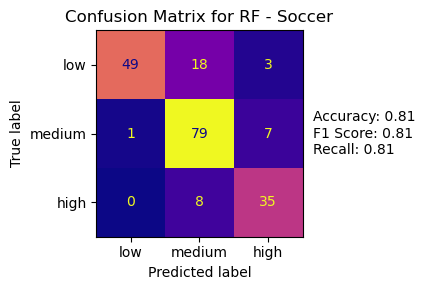

Accuracy: 0.815
F1 Score: 0.8148248106060606
Recall Score: 0.815
[[49 18  3]
 [ 1 79  7]
 [ 0  8 35]]


In [31]:
tier_order = ["low", "medium", "high"]
rf_soccer = RandomForestClassifier(random_state = 1216,
                                    n_estimators = 100,
                                    min_samples_split = 5,
                                    min_samples_leaf = 1,
                                    max_depth = 20,
                                    max_features = "log2")

rf_soccer.fit(X_soccer_train, y_soccer_train)
preds_rf_soccer = rf_soccer.predict(X_soccer_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_soccer_test, preds_rf_soccer)
f1 = f1_score(y_soccer_test, preds_rf_soccer, average="weighted")
recall = recall_score(y_soccer_test, preds_rf_soccer, average="weighted")
cm_soccer = confusion_matrix(y_soccer_test, preds_rf_soccer, labels=[0,1,2])
fig, ax = plt.subplots(figsize=(5,3))
disp_soccer = ConfusionMatrixDisplay(confusion_matrix=cm_soccer, display_labels=tier_order)
disp_soccer = disp_soccer.plot(ax=ax, cmap="plasma", colorbar=False)
disp_soccer.ax_.set_title('Confusion Matrix for RF - Soccer')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_soccer.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

print(cm_soccer)

In [32]:
labels_df = pd.DataFrame({
    "true_label": y_soccer_test,
    "predicted_label": preds_rf_soccer
}, index=y_soccer_test.index)

merged = df_soccer.loc[y_soccer_test.index].copy()
merged = merged.join(labels_df)

underpriced = merged[(merged["true_label"] == 0) & (merged["predicted_label"] == 2)]
overpriced = merged[(merged["true_label"] == 2) & (merged["predicted_label"] == 0)]

print("Underpriced Candidates:")
display(underpriced[["title", "price.value", "seller.feedbackScore", "days_listed", "year", "title_length"]])

print("Overpriced Candidates:")
display(overpriced[["title", "price.value"]])

Underpriced Candidates:


,title,price.value,seller.feedbackScore,days_listed,year,title_length
685,Adidas Soccer Jersey Medium Mens Blue France N...,34.99,859,8,NaN,76
356,Men's Adidas Al Nassr FC 24/25 Cristiano Ronal...,38.50,28040,153,2025.0,80
904,FC Barcelona 2018 2019 Home football shirt jer...,9.00,1168,179,2018.0,80


Overpriced Candidates:


,title,price.value


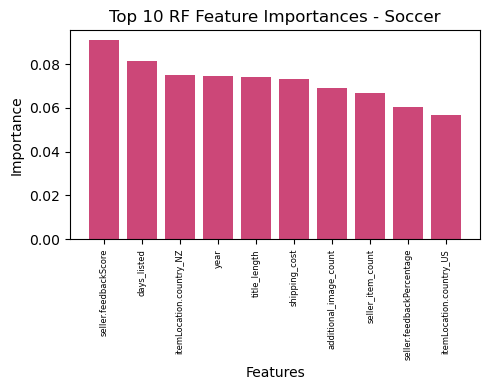

In [33]:
importances = rf_soccer.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top 10
top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(5, 4))
plt.title("Top 10 RF Feature Importances - Soccer")
plt.bar(range(top_n), importances[top_indices], align="center", color="#cc4778")
plt.xticks(range(top_n), [X_soccer_train.columns[i] for i in top_indices], rotation=90, fontsize=6)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig("images/3/fi_soccer_top10.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

In [34]:
from sklearn.tree import export_text

# Get one tree from the forest
tree = rf_soccer.estimators_[2]

# Print the tree structure in text form
tree_rules = export_text(tree, feature_names=list(X_soccer_train.columns))
print(tree_rules)

|--- itemLocation.country_US <= 0.50
|   |--- marketingPrice.originalPrice.value <= 72.49
|   |   |--- additional_image_count <= 3.00
|   |   |   |--- class: 0.0
|   |   |--- additional_image_count >  3.00
|   |   |   |--- class: 1.0
|   |--- marketingPrice.originalPrice.value >  72.49
|   |   |--- category_name_Soccer-National Teams <= 0.50
|   |   |   |--- priorityListing <= 0.50
|   |   |   |   |--- seller.feedbackScore <= 603.50
|   |   |   |   |   |--- itemLocation.country_PT <= 0.50
|   |   |   |   |   |   |--- itemLocation.country_CA <= 0.50
|   |   |   |   |   |   |   |--- seller.feedbackScore <= 19.00
|   |   |   |   |   |   |   |   |--- title_length <= 51.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- title_length >  51.50
|   |   |   |   |   |   |   |   |   |--- seller_item_count <= 4.00
|   |   |   |   |   |   |   |   |   |   |--- itemLocation.country_UA <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   

In [35]:
from sklearn.tree import export_graphviz
import graphviz

tree = rf_soccer.estimators_[2]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_soccer_train.columns,
                           class_names=rf_soccer.classes_.astype(str),
                           filled=True, rounded=True,
                           max_depth=3)  # limit depth here too

dot_lines = dot_data.split('\n')
for i, line in enumerate(dot_lines):
    if line.strip().startswith('digraph'):
        dot_lines.insert(i + 1, 'bgcolor="#E7E7E7";')
        break
dot_data_with_bg = '\n'.join(dot_lines)

graph = graphviz.Source(dot_data_with_bg)
graph.format = 'png'
graph.render("images/3/rf_tree_soccer") 
graph.view()  # Opens the PDF viewer

'images/3/rf_tree_soccer.png'

#### RF - PCA

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

features_soccer = df_soccer[["seller.feedbackPercentage", "seller.feedbackScore", 
                    "days_listed", "shipping_cost", "seller_item_count",
                    "additional_image_count", "title_length"]].fillna(0)

scaler = StandardScaler()
features_scaled_soccer = scaler.fit_transform(features_soccer)

pca = decomposition.PCA(n_components=5)  
X_pca_soccer = pca.fit_transform(features_scaled_soccer)
y_soccer = df_soccer["price_tier_encoded"]

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_soccer, y_soccer, test_size=0.2, random_state=1216
)

rf_pca = RandomForestClassifier(random_state = 1216,
                                    n_estimators = 100,
                                    min_samples_split = 5,
                                    min_samples_leaf = 1,
                                    max_depth = 20,
                                    max_features = "log2")
rf_pca.fit(X_train_pca, y_train_pca)

preds_pca = rf_pca.predict(X_test_pca)

accuracy = accuracy_score(y_test_pca, preds_pca)
f1 = f1_score(y_test_pca, preds_pca, average="weighted")
recall = recall_score(y_test_pca, preds_pca, average="weighted")

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.685
F1 Score: 0.691
Recall: 0.685


### Microwaves

#### DT

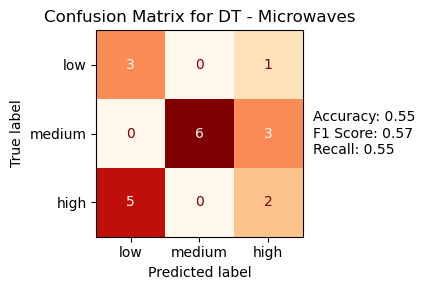

Accuracy: 0.55
F1 Score: 0.5676923076923076
Recall Score: 0.55


In [37]:
tier_order = ["low", "medium", "high"]
X_microwaves = df_microwaves.drop(columns=["title", "asin", "price_value", "price_tier", "coupon", 
                                           "price_list_price", "price_name", "cluster",
                                           "stock_info", "is_high_price"])
y_microwaves = df_microwaves["price_tier"]

temp = X_microwaves["cu_ft"] != "unknown"
X_microwaves = X_microwaves[temp].copy()
y_microwaves = y_microwaves[temp].copy()
X_microwaves["cu_ft"] = X_microwaves["cu_ft"].astype(float)

X_microwaves_train, X_microwaves_test, y_microwaves_train, y_microwaves_test = train_test_split(
    X_microwaves, y_microwaves, test_size=0.20, random_state=1216)
classifier_microwaves = DecisionTreeClassifier(random_state = 1216)
classifier_microwaves.fit(X_microwaves_train, y_microwaves_train)

preds_microwaves = classifier_microwaves.predict(X_microwaves_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_microwaves_test, preds_microwaves)
f1 = f1_score(y_microwaves_test, preds_microwaves, average="weighted")
recall = recall_score(y_microwaves_test, preds_microwaves, average="weighted")

cm_microwaves = confusion_matrix(y_microwaves_test, preds_microwaves)
fig, ax = plt.subplots(figsize=(5,3))
disp_microwaves = ConfusionMatrixDisplay(confusion_matrix=cm_microwaves, display_labels=tier_order)
disp_microwaves = disp_microwaves.plot(ax=ax, cmap="OrRd", colorbar=False)
disp_microwaves.ax_.set_title('Confusion Matrix for DT - Microwaves')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_microwave.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [38]:
## tuning, takes several minutes to run

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_microwaves = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_microwaves.fit(X_microwaves_train, y_microwaves_train)

# best_model_microwaves = grid_search_microwaves.best_estimator_

In [39]:
# print(grid_search_microwaves.best_params_)
# print(grid_search_microwaves.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


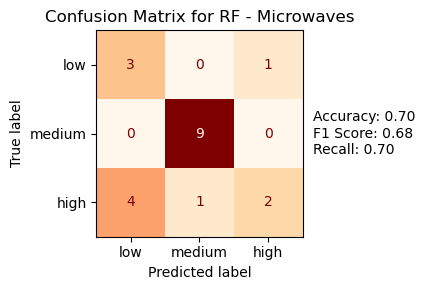

Accuracy: 0.7
F1 Score: 0.6754066985645932
Recall Score: 0.7


In [40]:
tier_order = ["low", "medium", "high"]
rf_microwaves = RandomForestClassifier(random_state = 1216,
                                       n_estimators = 200,
                                       min_samples_split = 5,
                                       min_samples_leaf = 2)

rf_microwaves.fit(X_microwaves_train, y_microwaves_train)
preds_rf_microwave = rf_microwaves.predict(X_microwaves_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_microwaves_test, preds_rf_microwave)
f1 = f1_score(y_microwaves_test, preds_rf_microwave, average="weighted")
recall = recall_score(y_microwaves_test, preds_rf_microwave, average="weighted")
cm_microwaves = confusion_matrix(y_microwaves_test, preds_rf_microwave)
fig, ax = plt.subplots(figsize=(5,3))
disp_microwaves = ConfusionMatrixDisplay(confusion_matrix=cm_microwaves, display_labels=tier_order)
disp_microwaves = disp_microwaves.plot(ax=ax, cmap="OrRd", colorbar=False)
disp_microwaves.ax_.set_title('Confusion Matrix for RF - Microwaves')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_microwave.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

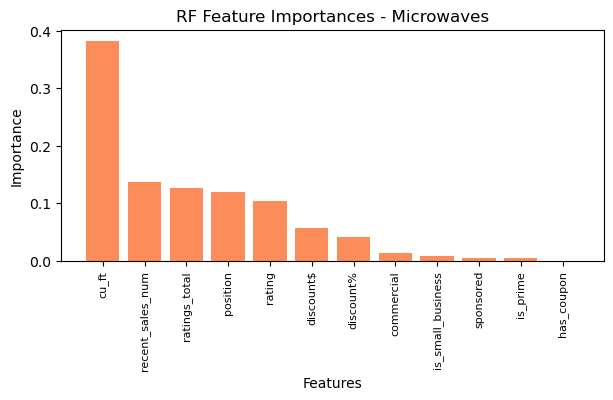

In [41]:
importances = rf_microwaves.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7, 3))
plt.title("RF Feature Importances - Microwaves")
plt.bar(range(X_microwaves_train.shape[1]), importances[indices], align="center", color="#fc8c59")
plt.xticks(range(X_microwaves_train.shape[1]), [X_microwaves_train.columns[i] for i in indices])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.savefig("images/3/fi_microwave.png", dpi=300, bbox_inches='tight')
plt.show()

### Lego

#### DT

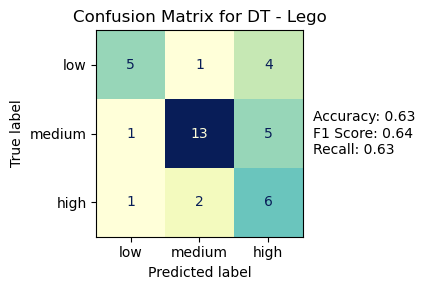

Accuracy: 0.631578947368421
F1 Score: 0.6446483856700574
Recall Score: 0.631578947368421


In [42]:
tier_order = ["low", "medium", "high"]
X_lego = df_lego.drop(columns=["title", "asin", "price_value", "price_tier", "coupon", 
                                "price_list_price", "price_name", "cluster",
                                "stock_info", "is_high_price"])

X_lego_encoded = pd.get_dummies(X_lego, columns=["lego_theme", "age_rec"])
y_lego = df_lego["price_tier"]                              
X_lego_train, X_lego_test, y_lego_train, y_lego_test = train_test_split(X_lego_encoded, y_lego,
                                                                 test_size=0.20, random_state=1216) 
classifier_lego = DecisionTreeClassifier(random_state = 1216)
classifier_lego.fit(X_lego_train, y_lego_train)

preds_lego = classifier_lego.predict(X_lego_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_lego_test, preds_lego)
f1 = f1_score(y_lego_test, preds_lego, average="weighted")
recall = recall_score(y_lego_test, preds_lego, average="weighted")

cm_lego = confusion_matrix(y_lego_test, preds_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=tier_order)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('Confusion Matrix for DT - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_lego.png", dpi=300, bbox_inches='tight')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

#### RF

In [43]:
## tuning, takes several minutes to run
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# rf = RandomForestClassifier(random_state=1216)
# grid_search_lego = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
# grid_search_lego.fit(X_lego_train, y_lego_train)

# best_model_lego = grid_search_lego.best_estimator_

In [44]:
# print(grid_search_lego.best_params_)
# print(grid_search_lego.best_score_)

{'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


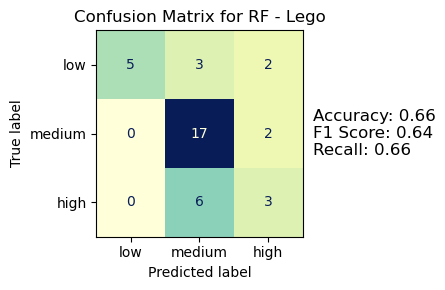

Accuracy: 0.6578947368421053
F1 Score: 0.64203216374269
Recall Score: 0.6578947368421053


In [45]:
tier_order = ["low", "medium", "high"]
rf_lego = RandomForestClassifier(random_state = 1216,
                                       n_estimators = 200,
                                       min_samples_split = 10,
                                       min_samples_leaf = 2)
rf_lego.fit(X_lego_train, y_lego_train)
preds_rf_lego = rf_lego.predict(X_lego_test)

accuracy = accuracy_score(y_lego_test, preds_rf_lego)
f1 = f1_score(y_lego_test, preds_rf_lego, average="weighted")
recall = recall_score(y_lego_test, preds_rf_lego, average="weighted")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
cm_lego = confusion_matrix(y_lego_test, preds_rf_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=tier_order)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('Confusion Matrix for RF - Lego')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_lego.png", dpi=300, bbox_inches='tight')
plt.show()


print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

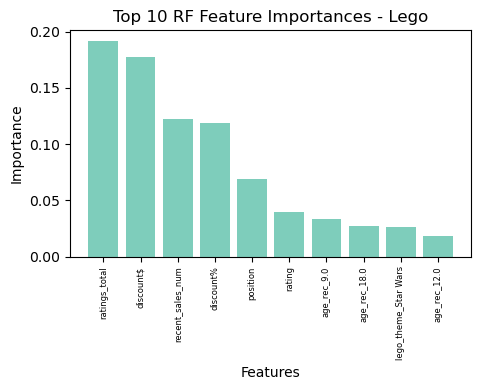

In [46]:
importances = rf_lego.feature_importances_
indices = np.argsort(importances)[::-1]

# Limit to top 10
top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(5, 4))
plt.title("Top 10 RF Feature Importances - Lego")
plt.bar(range(top_n), importances[top_indices], align="center", color="#7ecdbb")
plt.xticks(range(top_n), [X_lego_train.columns[i] for i in top_indices], rotation=90, fontsize=6)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.savefig("images/3/fi_lego_top10.png", dpi=300, bbox_inches='tight')
plt.show()

Class 0 = high
Class 1 = low
Class 2 = medium


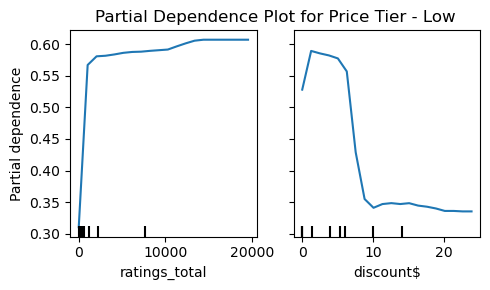

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_lego_encoded = le.fit_transform(df_lego["price_tier"])  # converts to 0,1,2
X_lego_train, X_lego_test, y_lego_train, y_lego_test = train_test_split(
    X_lego_encoded, y_lego_encoded, test_size=0.20, random_state=1216
)
rf_lego.fit(X_lego_train, y_lego_train)
for i, class_label in enumerate(le.classes_):
    print(f"Class {i} = {class_label}")

import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
feature_names = ['ratings_total', "discount$"]
fig, ax = plt.subplots(figsize=(5, 3))
PartialDependenceDisplay.from_estimator(
    rf_lego,
    X_lego_train,
    features=feature_names,
    kind='average',
    target=1,
    grid_resolution=20,
    ax=ax
)
ax.set_title("Partial Dependence Plot for Price Tier - Low")
plt.tight_layout()
plt.savefig("images/3/pdp_lego.png", dpi=300, bbox_inches='tight')
plt.show()

#### Lego with 2 classes

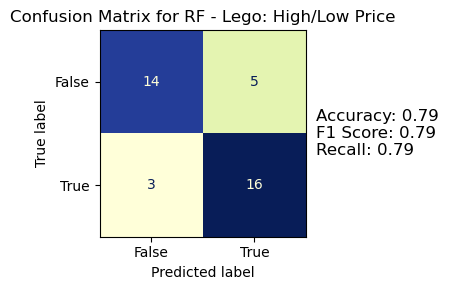

In [48]:
X_lego = df_lego.drop(columns=["title", "asin", "price_value", "price_tier", "coupon", 
                                "price_list_price", "price_name", "cluster",
                                "stock_info", "is_high_price"])

X_lego_encoded = pd.get_dummies(X_lego, columns=["lego_theme", "age_rec"])
y_lego = df_lego["is_high_price"]                              
X_lego_train, X_lego_test, y_lego_train, y_lego_test = train_test_split(X_lego_encoded, y_lego,
                                                                 test_size=0.20, random_state=1216) 
rf_lego = RandomForestClassifier(random_state = 1216,
                                       n_estimators = 200,
                                       min_samples_split = 10,
                                       min_samples_leaf = 2)
rf_lego.fit(X_lego_train, y_lego_train)

preds_lego = rf_lego.predict(X_lego_test)
accuracy = accuracy_score(y_lego_test, preds_lego)
f1 = f1_score(y_lego_test, preds_lego, average="micro")
recall = recall_score(y_lego_test, preds_lego, average="micro")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score
cm_lego = confusion_matrix(y_lego_test, preds_lego)
fig, ax = plt.subplots(figsize=(5,3))
disp_lego = ConfusionMatrixDisplay(confusion_matrix=cm_lego, display_labels=rf_lego.classes_)
disp_lego = disp_lego.plot(ax=ax, cmap="YlGnBu", colorbar=False)
disp_lego.ax_.set_title('Confusion Matrix for RF - Lego: High/Low Price')
textstr = f'Accuracy: {accuracy:.2f}\nF1 Score: {f1:.2f}\nRecall: {recall:.2f}'
# Coordinates are relative to axes (x=0 is left, y=1 is top)
ax.text(1.05, 0.5, textstr, transform=ax.transAxes, fontsize=12, verticalalignment='center')
plt.tight_layout()
plt.savefig("images/3/cm_rf_lego2.png", dpi=300, bbox_inches='tight')
plt.show()

In [49]:
#Add labels to test data 
X_test_with_labels = X_lego_test.copy()
X_test_with_labels["true_label"] = y_lego_test
X_test_with_labels["predicted_label"] = preds_lego

#Get original rows from full dataset using test indices
merged = df_lego.iloc[X_lego_test.index].copy()
merged["true_label"] = y_lego_test.values
merged["predicted_label"] = preds_lego

#mis-classes
underpriced = merged[(merged["true_label"] == 0) & (merged["predicted_label"] == 1)]
overpriced = merged[(merged["true_label"] == 1) & (merged["predicted_label"] == 0)]

print("Underpriced Candidates:")
display(underpriced[["title", "price_value", "ratings_total", "discount%", "lego_theme", "age_rec", "true_label", "predicted_label"]])

print("Overpriced Candidates:")
display(overpriced[["title", "price_value", "ratings_total", "discount%", "lego_theme", "age_rec", "true_label", "predicted_label"]])

Underpriced Candidates:


,title,price_value,ratings_total,discount%,lego_theme,age_rec,true_label,predicted_label
9,LEGO Speed Champions Oracle Red Bull Racing RB...,25.64,508.0,0.05,Speed Champions,18.0,False,True
24,LEGO Botanicals Happy Plants Building Toys - B...,22.95,174.0,0.00,Botanicals,9.0,False,True
179,Flowers Roses Building Set Compatible with Leg...,19.99,13.0,0.38,Art,NaN,False,True
175,LEGO Jurassic World Collection [DVD],13.86,0.0,0.00,Other,NaN,False,True
173,Tree House Building Set Compatible with Lego F...,24.99,163.0,0.00,Friends,6.0,False,True


Overpriced Candidates:


,title,price_value,ratings_total,discount%,lego_theme,age_rec,true_label,predicted_label
71,LEGO Animal Crossing K.K.’s Concert in The Pla...,34.81,296.0,0.56,Other,7.0,True,False
87,LEGO City 4x4 Off-Roader Adventures 60387 Buil...,29.99,2009.0,0.00,City,6.0,True,False
177,"LEGO Icons Porsche 911 10295 Building Set, Col...",167.99,1844.0,0.00,Other,NaN,True,False


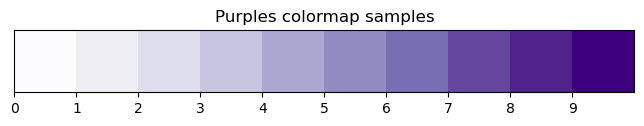

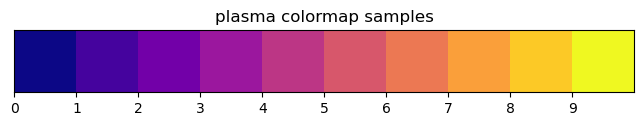

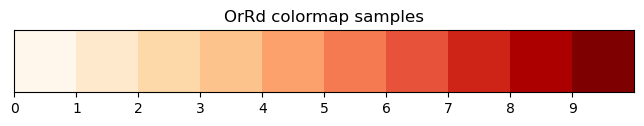

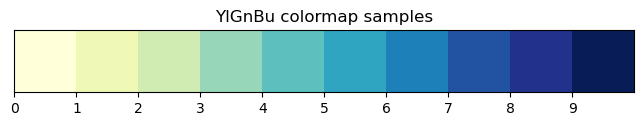

In [50]:
import matplotlib.pyplot as plt
import numpy as np

colormaps = ['Purples', 'plasma', 'OrRd', 'YlGnBu']

for cmap_name in colormaps:
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i / 9) for i in range(10)]  # 10 color steps

    plt.figure(figsize=(8, 1))
    plt.imshow([colors], extent=[0, 10, 0, 1])
    plt.xticks(range(10), [f'{i}' for i in range(10)])
    plt.yticks([])
    plt.title(f'{cmap_name} colormap samples')
    plt.show()




In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Choose your colormap
cmap = plt.get_cmap("YlGnBu")  # or 'plasma', 'viridis', 'YlGnBu'

n_colors = 9  
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]

color = colors[3]

# Convert to hex (for use in other plots like bar charts)
hex_color = mcolors.to_hex(color)

print("RGBA:", color)
print("Hex:", hex_color)


RGBA: (0.4951787773933103, 0.8028604382929643, 0.733748558246828, 1.0)
Hex: #7ecdbb
